# Hito 3 Resultados

- Implementación: Usando Python 3, se logró cargar la imagen para empezar su manejo en escala de grises, esto se hace mediante una función que se exporta de la librería PIL:

In [1]:
from PIL import Image
# Cargar la imagen para traspasarla a escala de grises 
img = Image.open('halo.tif').convert('L')

- Implementación: Una vez que se obtuvo la imagen en escala de grises, esta se debe guadar con la función save(), en donde le otorgo un nombre a mi nueva imagen en formato "png"

In [2]:
# Guardar la imagen con formato png
img.save('halosgris.png','png')
print(img)

<PIL.Image.Image image mode=L size=906x468 at 0x10806C390>


- Resultados: se logró crear una nueva imagen en escala de grises con un tamaño de 424.008 píxeles en total. Esta imagen obtenida, es una imagen bidimensional dividida en 469 píxeles de alto y  906 de ancho. 

- Implementación: Una vez guardada la imagen en escala de grises se lee mediante la función imread(), que se importa de la librería skimage. 

In [3]:
from skimage import io
halo_gris = io.imread('halosgris.png')
print(halo_gris)

[[116 116 116 ... 133 134 133]
 [118 118 118 ... 133 133 133]
 [118 118 118 ... 133 133 132]
 ...
 [155 155 153 ... 136 136 135]
 [155 155 153 ... 136 135 137]
 [154 153 153 ... 134 133 136]]


- **Shape** para obtener la forma de la imagen

In [4]:
halo_gris.shape

(468, 906)

- **Size** para obtener el número total de píxeles

In [5]:
halo_gris.size

424008

**Definiremos funciones para mostrar las imgagenes con maltplotlib**

- Implementación: Para no estar en todo momento escribiendo comandos para mostrar o comparar dos imágenes, se definen dos funciones con librería matplotlib que nos sirve para mostrar imágenes mediante funciones.

        - Se crea la función show_image para mostrar la imagen que uno estime conveniente con un tipo de imagen gris y título.

In [6]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

        - Se crea la función plot_comparison para mostrar dos imágenes, una sería la original y la otra con algún filtro o método aplicado y así poder comparar ambas imágenes.

In [7]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   figsize=(15, 13), 
                                   sharex=True, 
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray) 
    ax1.set_title('original') 
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray) 
    ax2.set_title(title_filtered) 
    ax2.axis('off')

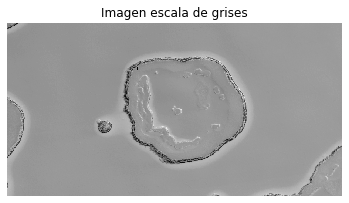

In [8]:
show_image(halo_gris, "Imagen escala de grises")

In [9]:
import numpy as np
# Cargar la imagen usando Matplotlib
halo_image = io.imread('halo.tif') 
type(halo_image)

numpy.ndarray

# Umbralización / Thresholding

El umbral se usa para dividir el fondo y primer plano de las imágenes en escala de grises, escencialmente haciéndolas en blanco y negro. 

Comparamos cada píxel con un valor de umbral dado:

    255(blanco) si el píxel > valor de umbral
    0(negro) si el píxel < valor de umbral
    
Es el método mas simple de segmentación de imágenes. La imagen resultante es BINARIA

- Permite aislar elementos y se utiliza en la detección de objetos, reconocimiento facial y otras aplicaciones.
- Funciona mejor en imágenes de alto contraste en escala de grises.

**Para poner en umbral imágenes en color, primero debemos convertiras a escala de grises.**

In [10]:
# Obtener valor umbral optimo
thresh = 98
print("umbral:", thresh)

umbral: 98


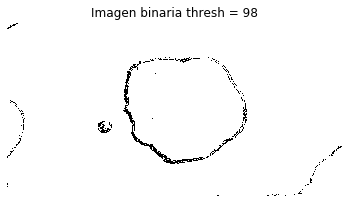

In [11]:
# Aplicamos el umbral a la imagen
binary = halo_gris > thresh
# Mostrar la imagen 
show_image(binary, "Imagen binaria thresh = 98")

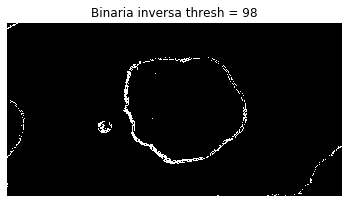

In [12]:
# Aplicamos el umbral invertido a la imagen
inverted_binary = halo_gris <= thresh
# Mostrar la imagen 
show_image(inverted_binary, "Binaria inversa thresh = 98")


## Try_all_threshold

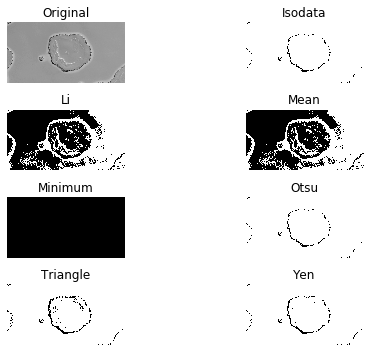

In [13]:
from skimage.filters import try_all_threshold 
from matplotlib.pyplot import *
#Obtengo todas las imagenes resultantes
fig, ax = try_all_threshold(halo_gris, verbose=False)
# Mostrando resultados plots
plt.show(fig, ax)

# Histogramas
El histograma en una imagen es una representación gráfica de la cantidad de píxeles de cada valor de intensidad.
De 0 (negro puro) a 255 (blanco puro)

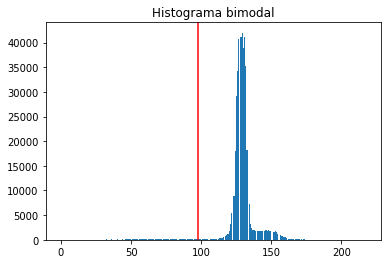

In [14]:
ax[1] = plt.subplot()
ax[1].hist(halo_gris.ravel(), bins=256)
ax[1].set_title('Histograma bimodal')
ax[1].axvline(thresh, color='r')
plt.show()

## Threshold_otsu (Global)

98


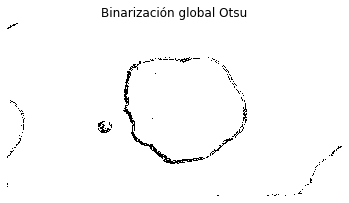

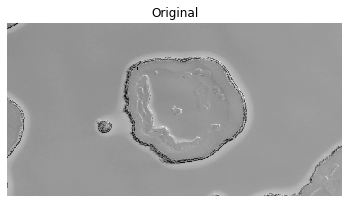

(468, 906)


In [15]:
# Importo la función threshold_otsu  
from skimage.filters import threshold_otsu 
# Obtengo el valor de umbral óptimo
thresh = threshold_otsu(halo_gris)
print(thresh)
# Aplico thresholding a la imagen
binary_global = halo_gris > thresh
# Mostrar imagen original y binarizada
show_image(binary_global, 'Binarización global Otsu')
show_image(halo_gris, 'Original')
print(binary_global.shape)
np.savetxt("otsu.csv", binary_global, delimiter=",")

# Detección de bordes

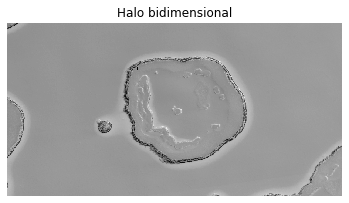

In [16]:
from skimage.color import rgb2gray
halo_gris = rgb2gray(halo_image)
show_image(halo_gris, 'Halo bidimensional')

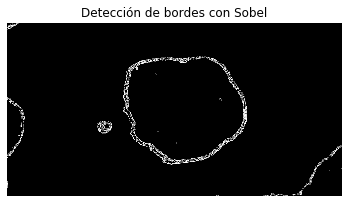

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
from skimage.filters import sobel 
import pandas as pd
# Aplico filtro sobel detección de bordes
edge_sobel = sobel(binary_global)
# Comparo
show_image(edge_sobel, "Detección de bordes con Sobel")
print(edge_sobel)
np.savetxt("sobel.csv", edge_sobel, delimiter=",")

## Find_contours( )

In [18]:
from skimage import measure
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
# Encuentra contornos a un valor constante de 0.8
contours = measure.find_contours(binary_global, 0.8)

In [19]:
for contour in contours: 
    print(contour)
    

[[ 0.  25.2]
 [ 0.2 25. ]
 [ 0.2 24. ]
 [ 1.  23.2]
 [ 2.  23.2]
 [ 2.2 23. ]
 [ 2.2 22. ]
 [ 3.  21.2]
 [ 3.2 21. ]
 [ 3.2 20. ]
 [ 3.  19.8]
 [ 2.2 19. ]
 [ 2.2 18. ]
 [ 3.  17.2]
 [ 3.2 17. ]
 [ 4.  16.2]
 [ 4.8 17. ]
 [ 4.  17.8]
 [ 3.8 18. ]
 [ 3.8 19. ]
 [ 4.  19.2]
 [ 4.2 19. ]
 [ 5.  18.2]
 [ 5.2 18. ]
 [ 5.2 17. ]
 [ 5.2 16. ]
 [ 5.2 15. ]
 [ 5.2 14. ]
 [ 5.2 13. ]
 [ 6.  12.2]
 [ 6.2 12. ]
 [ 6.2 11. ]
 [ 7.  10.2]
 [ 7.8 11. ]
 [ 8.  11.2]
 [ 9.  11.2]
 [ 9.2 11. ]
 [ 9.2 10. ]
 [ 9.   9.8]
 [ 8.2  9. ]
 [ 8.   8.8]
 [ 7.   8.8]
 [ 6.8  9. ]
 [ 6.   9.8]
 [ 5.   9.8]
 [ 4.2  9. ]
 [ 5.   8.2]
 [ 5.2  8. ]
 [ 5.2  7. ]
 [ 6.   6.2]
 [ 7.   6.2]
 [ 7.2  6. ]
 [ 7.2  5. ]
 [ 7.   4.8]
 [ 6.2  4. ]
 [ 7.   3.2]
 [ 8.   3.2]
 [ 8.8  4. ]
 [ 9.   4.2]
 [ 9.8  5. ]
 [ 9.   5.8]
 [ 8.8  6. ]
 [ 8.8  7. ]
 [ 8.8  8. ]
 [ 9.   8.2]
 [10.   8.2]
 [10.2  8. ]
 [10.2  7. ]
 [10.2  6. ]
 [10.2  5. ]
 [10.2  4. ]
 [11.   3.2]
 [12.   3.2]
 [12.2  3. ]
 [12.2  2. ]
 [12.2  1. ]
 [13.   0.2]

[[297.  265.8]
 [296.8 266. ]
 [296.8 267. ]
 [296.8 268. ]
 [296.8 269. ]
 [296.  269.8]
 [295.  269.8]
 [294.8 270. ]
 [295.  270.2]
 [295.8 271. ]
 [295.  271.8]
 [294.8 272. ]
 [294.  272.8]
 [293.8 273. ]
 [294.  273.2]
 [294.8 274. ]
 [294.  274.8]
 [293.  274.8]
 [292.8 275. ]
 [292.  275.8]
 [291.8 276. ]
 [291.  276.8]
 [290.8 277. ]
 [290.  277.8]
 [289.8 278. ]
 [289.  278.8]
 [288.8 279. ]
 [288.  279.8]
 [287.  279.8]
 [286.8 280. ]
 [286.  280.8]
 [285.  280.8]
 [284.8 281. ]
 [284.  281.8]
 [283.  281.8]
 [282.8 282. ]
 [282.  282.8]
 [281.  282.8]
 [280.2 282. ]
 [280.  281.8]
 [279.8 282. ]
 [279.  282.8]
 [278.  282.8]
 [277.8 283. ]
 [277.  283.8]
 [276.2 283. ]
 [276.  282.8]
 [275.  282.8]
 [274.  282.8]
 [273.2 282. ]
 [273.  281.8]
 [272.  281.8]
 [271.  281.8]
 [270.2 281. ]
 [270.2 280. ]
 [270.  279.8]
 [269.2 279. ]
 [269.  278.8]
 [268.2 278. ]
 [268.2 277. ]
 [268.2 276. ]
 [269.  275.2]
 [269.8 276. ]
 [269.8 277. ]
 [269.8 278. ]
 [270.  278.2]
 [270.8 27

[[377.2 456. ]
 [377.  455.8]
 [376.8 456. ]
 [377.  456.2]
 [377.2 456. ]]
[[402.  830.8]
 [401.8 831. ]
 [401.  831.8]
 [400.  831.8]
 [399.8 832. ]
 [399.  832.8]
 [398.8 833. ]
 [398.  833.8]
 [397.8 834. ]
 [397.8 835. ]
 [397.  835.8]
 [396.  835.8]
 [395.  835.8]
 [394.  835.8]
 [393.8 836. ]
 [393.  836.8]
 [392.  836.8]
 [391.8 837. ]
 [391.  837.8]
 [390.2 837. ]
 [390.2 836. ]
 [390.  835.8]
 [389.8 836. ]
 [389.  836.8]
 [388.8 837. ]
 [388.8 838. ]
 [388.  838.8]
 [387.  838.8]
 [386.8 839. ]
 [386.8 840. ]
 [386.  840.8]
 [385.8 841. ]
 [385.  841.8]
 [384.8 842. ]
 [384.8 843. ]
 [384.8 844. ]
 [384.  844.8]
 [383.8 845. ]
 [383.8 846. ]
 [383.  846.8]
 [382.  846.8]
 [381.8 847. ]
 [381.  847.8]
 [380.2 847. ]
 [381.  846.2]
 [381.2 846. ]
 [381.2 845. ]
 [381.  844.8]
 [380.2 844. ]
 [380.  843.8]
 [379.8 844. ]
 [379.  844.8]
 [378.8 845. ]
 [379.  845.2]
 [379.8 846. ]
 [379.  846.8]
 [378.8 847. ]
 [378.  847.8]
 [377.2 847. ]
 [377.2 846. ]
 [377.  845.8]
 [376.2 8

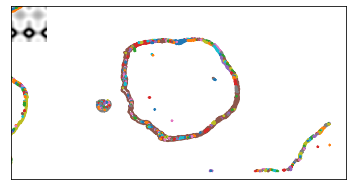

In [20]:
# Mostrar la imagen y trazar todos los contornos encontrados
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Encontrar los bordes con Canny

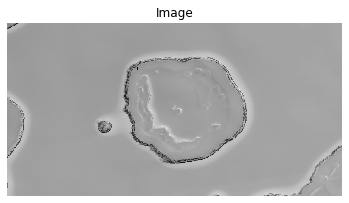

In [21]:
from skimage.restoration import denoise_bilateral 
# Aplicar filtro de eliminación de ruido bilateral
halosinruido = denoise_bilateral(halo_gris, multichannel=False)
show_image(halosinruido)

### CANNY SIGMA DE 1

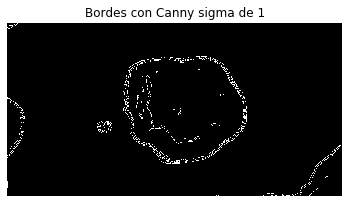

In [22]:
from skimage.feature import canny
# Aplicar detector canny
canny_edges = canny(halosinruido)
# Mostrar
show_image(canny_edges, "Bordes con Canny sigma de 1")

In [30]:
canny_edges


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### CANNY SIGMA DE 0.5

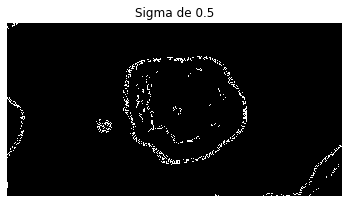

In [24]:
# Aplicar detector Canny con un sigma de 0.5
canny_edges_0_5 = canny(halosinruido, sigma=0.5)
# Mostrar
show_image(canny_edges_0_5, "Sigma de 0.5")

In [25]:
print(canny_edges_0_5.shape)
print(canny_edges_0_5)
np.savetxt("canny05.csv", canny_edges_0_5, delimiter=",")

(468, 906)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# Harris corner detector

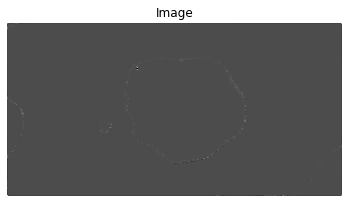

In [26]:
from skimage.feature import corner_harris 
# convertir escala de grises
image = rgb2gray(halo_gris)
# Aplicar detector de esquinas Hariis en la imagen
measure_image = corner_harris(halo_gris)
# mostrar
show_image(measure_image)

In [27]:
from skimage.feature import corner_peaks
# Encuentra las coordenadas de las esquinas
coords = corner_peaks(corner_harris(canny_edges), min_distance=5) 
print("Un total de", len(coords), "esquinas fueron detectadas.")  

Un total de 173 esquinas fueron detectadas.


In [28]:
# Funcion para mostrar imagen con esquinas
def show_image_with_corners(image, coords, title="Corners detected"): 
    plt.imshow(image, interpolation='nearest', cmap='gray') 
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15) 
    plt.axis('off')
    plt.show()

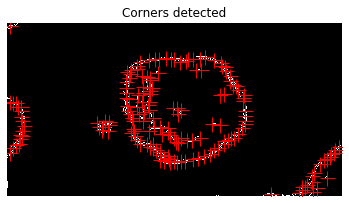

In [29]:
# Mostrar imagen con marcas en las esquinas detectadas
show_image_with_corners(canny_edges, coords)
np.savetxt("esquinas.csv", coords, delimiter=",")